In [1]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U git+https://github.com/albu/albumentations > /dev/null && echo  
!pip install git+https://github.com/PyTorchLightning/pytorch-lightning

In [8]:
!pip uninstall opencv_python_headless -y
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python-headless 4.5.4.60
Uninstalling opencv-python-headless-4.5.4.60:
  Successfully uninstalled opencv-python-headless-4.5.4.60
     |████████████████████████████████| 21.8 MB 5.4 MB/s 


In [1]:
%cd /content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-neo

/content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-neo


In [2]:
from glob import glob

def get_all_image_name():
    path_images = glob('/content/drive/MyDrive/20211/prj3/data/train/train/*.jpeg')
    images_name_list = [i.split('/')[-1].split('.')[0] for i in path_images]
    return images_name_list 
images_name_list = get_all_image_name() 

path_img = '/content/drive/MyDrive/20211/prj3/data/train/train'
path_gt = '/content/drive/MyDrive/20211/prj3/data/train_gt/train_gt'
from data_loader import PolypDataset
import matplotlib.pyplot as plt

pl_dataset = PolypDataset(images_name_list, path_img, path_gt)

# show image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


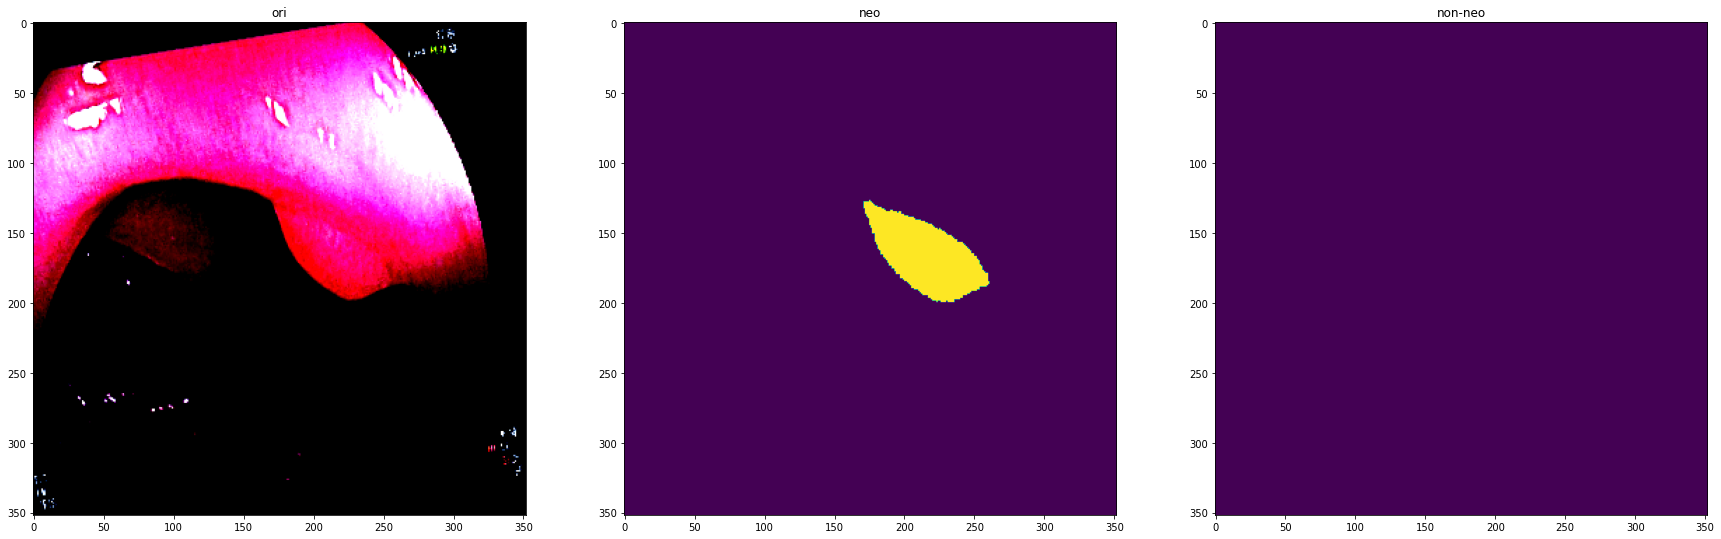

In [10]:
# from data_loader import PolypDataset
# import matplotlib.pyplot as plt
# import numpy as np

# r = pl_dataset.__getitem__(0)
# image = r['image'].permute(1, 2, 0).numpy()  # (3, 352, 352) => (352, 352, 3)
# gt = r['gt'].permute(1, 2, 0).numpy()   # [2, 352, 352] => (352, 352, 2) 
# # print(np.unique(gt[:,:,0])) # cái vùng neo , chỉ chưa giá trị 0-1
# # print(np.unique(gt[:,:,1])) # cái vùng non- neo , chỉ chưa giá trị 0-1
# f, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 30))
# ax[0].set_title('ori')
# ax[1].set_title('neo')
# ax[2].set_title('non-neo')
# ax[0].imshow(image)
# ax[1].imshow(gt[:,:,0])
# ax[2].imshow(gt[:,:,1])

# train

In [3]:
import train
train.train_loop(pl_dataset)

Using cache found in /root/.cache/torch/hub/PingoLH_Pytorch-HarDNet_master


ImageNet pretrained weights for HarDNet68 is loaded
Done load hardnet 68 
Epoch 001/050


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with othe

Epoch 001 | Step 0000/0063 | Train loss: 0.1756|dice 0.8491  
Epoch 001 | Step 0010/0063 | Train loss: 0.1916|dice 0.8304  
Epoch 001 | Step 0020/0063 | Train loss: 0.2228|dice 0.8180  
Epoch 001 | Step 0030/0063 | Train loss: 0.2588|dice 0.8100  
Epoch 001 | Step 0040/0063 | Train loss: 0.2719|dice 0.7981  
Epoch 001 | Step 0050/0063 | Train loss: 0.2698|dice 0.8003  
Epoch 001 | Step 0060/0063 | Train loss: 0.2725|dice 0.7992  
Epoch 001 | Step 0062/0063 | Train loss: 0.2728|dice 0.7982  
Epoch 002/050
Epoch 002 | Step 0000/0063 | Train loss: 0.2771|dice 0.7637  
Epoch 002 | Step 0010/0063 | Train loss: 0.4118|dice 0.8092  
Epoch 002 | Step 0020/0063 | Train loss: 0.3281|dice 0.8094  
Epoch 002 | Step 0030/0063 | Train loss: 0.3165|dice 0.8001  
Epoch 002 | Step 0040/0063 | Train loss: 0.3374|dice 0.8008  
Epoch 002 | Step 0050/0063 | Train loss: 0.3318|dice 0.8001  
Epoch 002 | Step 0060/0063 | Train loss: 0.3157|dice 0.7959  
Epoch 002 | Step 0062/0063 | Train loss: 0.3181|dice 0.7

Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: ignored

In [9]:
import test
test.run_test_neo("/content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-neo/model/pth/neounet/neo_epoch048_loss0.25961.pth")

Using cache found in /root/.cache/torch/hub/PingoLH_Pytorch-HarDNet_master


ImageNet pretrained weights for HarDNet68 is loaded
Done load hardnet 68 


0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecat

In [10]:
import output.submit_origin as sb
sb.make_submit("/content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-neo/output/neo_epoch048_loss0.25961")